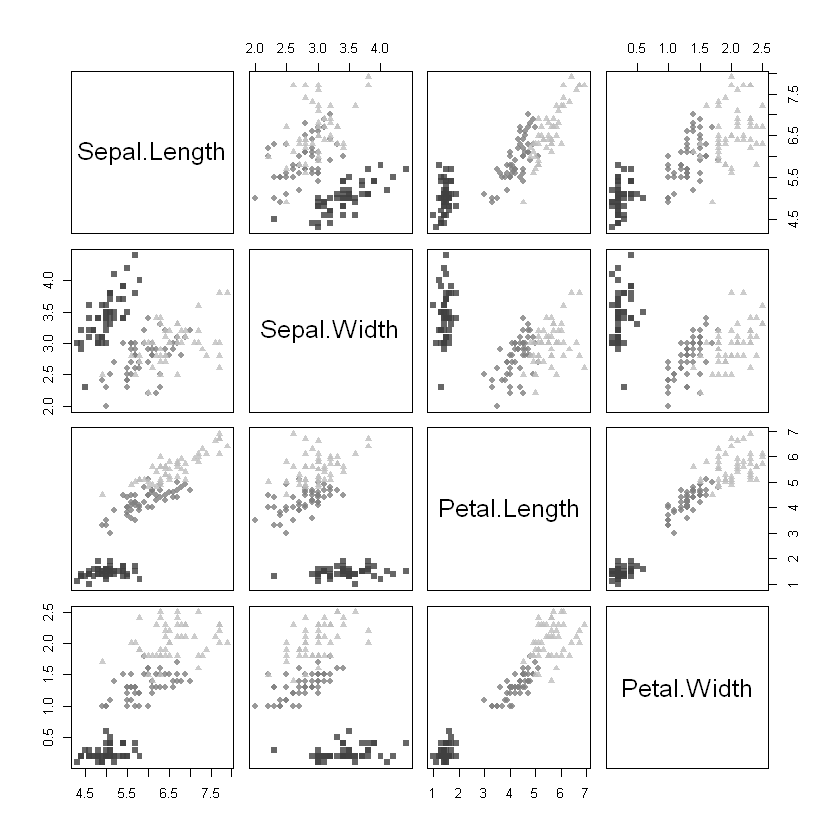

In [5]:
sp_color=c(rep(rgb(.25,.25,.25,.8),50),
           rep(rgb(.50,.50,.50,.8),50),
           rep(rgb(.75,.75,.75,.8),50))

sp_figure=c(rep(15,50),
            rep(16,50),
            rep(17,50))


#X11()
pairs(iris[,1:4], col= sp_color,pch=sp_figure)


In [6]:
##############################
#### TABLAS DE FRECUENCIA ####
##############################

###### Tabla de frecuencia no agrupada

#data=sample(iris$Petal.Length,25)
data=c(1.4,1.4,1.2,1.7,4.7,1.4,5.1,1.4,1.6,5.9,5.1,1.3,6.6,1.1,4.6,1.5,1.3,1.4,4.0,4.3,5.1,4.7,6.7,5.0,4.5)

print (data)
print (sort(data))
fr_df=data.frame(table(data))
colnames(fr_df)=c("Var", "xi")
fr_df$fi=fr_df$xi/sum(fr_df$xi)
fr_df$porc=paste(round(fr_df$fi*100,digits=1),"%",sep="")
fr_df$Ni=cumsum(fr_df$xi)
fr_df$Fi=cumsum(fr_df$fi)
#write.csv2 (fr_df, "ocurr.csv")


 [1] 1.4 1.4 1.2 1.7 4.7 1.4 5.1 1.4 1.6 5.9 5.1 1.3 6.6 1.1 4.6 1.5 1.3 1.4 4.0
[20] 4.3 5.1 4.7 6.7 5.0 4.5
 [1] 1.1 1.2 1.3 1.3 1.4 1.4 1.4 1.4 1.4 1.5 1.6 1.7 4.0 4.3 4.5 4.6 4.7 4.7 5.0
[20] 5.1 5.1 5.1 5.9 6.6 6.7


$breaks
 [1] 4.3 4.7 5.1 5.5 5.9 6.3 6.7 7.1 7.5 7.9

$counts
[1] 11 30 18 24 25 22  9  5  6

$density
[1] 0.18333333 0.50000000 0.30000000 0.40000000 0.41666667 0.36666667 0.15000000
[8] 0.08333333 0.10000000

$mids
[1] 4.5 4.9 5.3 5.7 6.1 6.5 6.9 7.3 7.7

$xname
[1] "data_b"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[1] 4.7 4.6 4.6 4.4 4.3 4.6 4.7 4.4 4.5 4.4 4.6

[1] 30

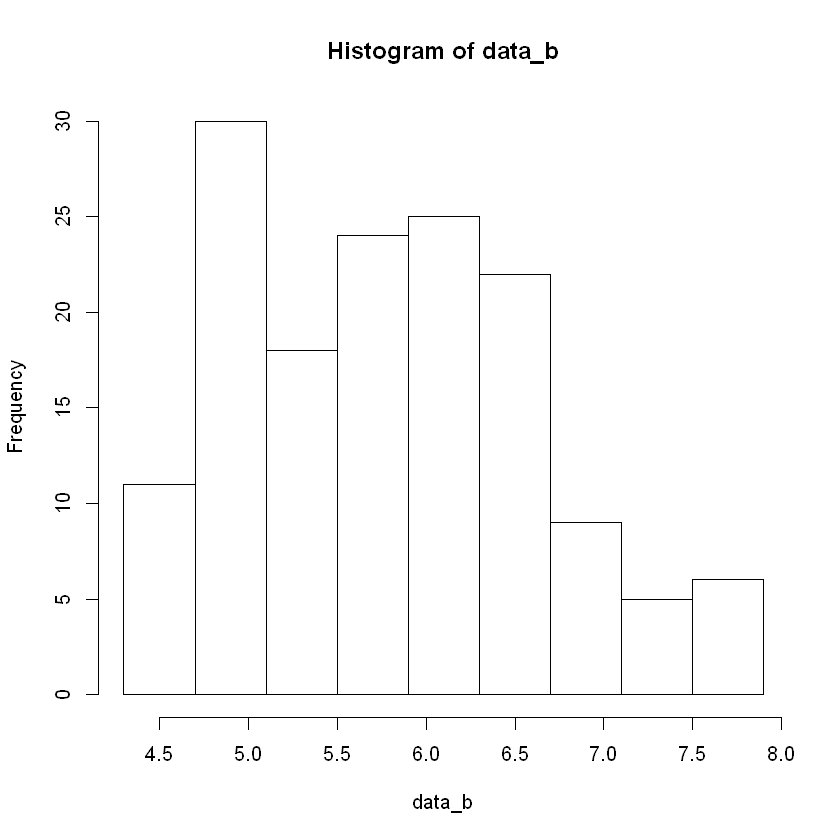

In [7]:
######Tabla de frecuencia Agrupada

data_b=iris$Sepal.Length
#write.csv2 (iris, "iris.csv")
rang_Sepal.Length=max(data_b)-min(data_b)
k=nclass.Sturges(data_b)#1+log2(150)
int_len=rang_Sepal.Length/k

brks=c(min(data_b))
for (i in (1:k)){brks=c(brks,(0.4*i)+min(data_b))}

hist_db=hist(data_b, breaks=brks)
hist_db

data_b[data_b<=4.7]#int 1
length(data_b[data_b>4.7&data_b<=5.1])#int 2

dat_agrup=data.frame(
limits=paste(hist_db$breaks[1:9], hist_db$breaks[2:10], sep=" - "),
mr_class=hist_db$mids,
fr_abs=hist_db$counts,
fr_rel=round(hist_db$counts/150,3),
fr_abs_acum=cumsum(hist_db$counts),
fr_rel_acum=round(cumsum(hist_db$counts/150),3)
)
#write.csv2 (dat_agrup, "dat_agrup.csv")



In [8]:
#############################
#### GRAFICOS ####
#############################

sp_sample=sample(iris$Species,45)


#"""
#sp_sample
# [1] setosa setosa virginica setosa versicolor virginica virginica
# [8] virginica virginica versicolor versicolor versicolor versicolor virginica
#[15] versicolor versicolor setosa versicolor versicolor virginica versicolor
#[22] versicolor versicolor versicolor setosa virginica versicolor versicolor
#[29] versicolor versicolor versicolor virginica versicolor setosa setosa
#[36] virginica virginica setosa virginica versicolor virginica setosa
#[43] setosa virginica versicolor
#Levels: setosa versicolor virginica
#"""

fr_tbl_sp_sm=data.frame(table(sp_sample))
fr_tbl_sp_sm$fr_rel=prop.table(table(sp_sample))



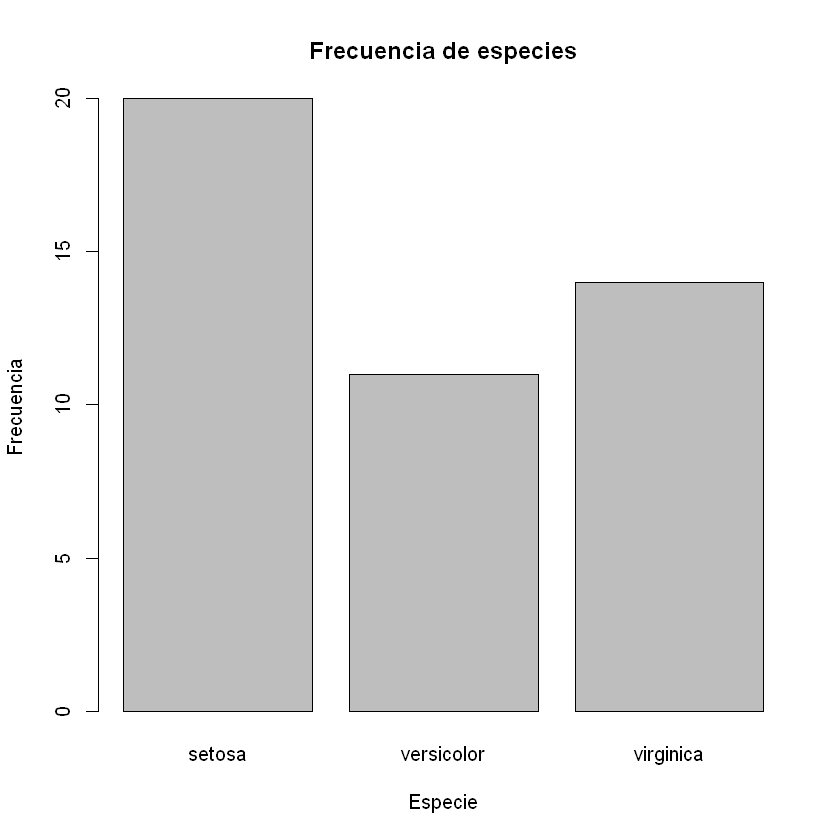

In [9]:
### Barras
barplot(table(sp_sample), main="Frecuencia de especies", xlab="Especie", ylab="Frecuencia")


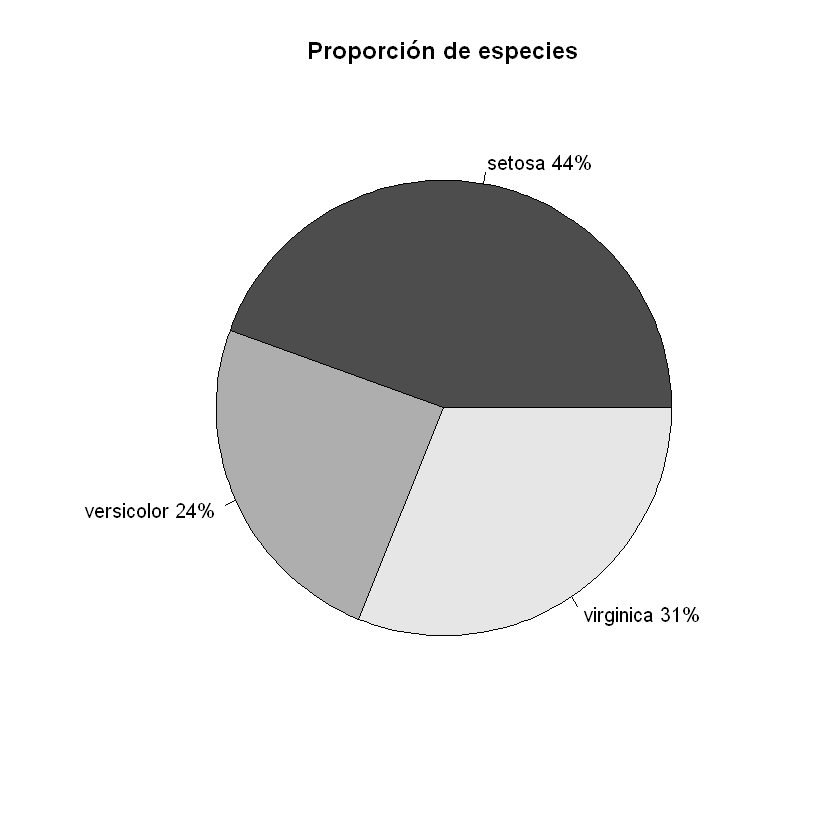

In [10]:
### Torta
pie(prop.table(table(sp_sample)),
  main="Proporción de especies",
  col = gray.colors(3),
  labels = paste(fr_tbl_sp_sm$sp_sample, paste(round(fr_tbl_sp_sm$fr_rel*100,0),"%",sep=""))
)


In [11]:
### Tallos y hojas
stem(data, scale=1.5)
table(data)




  The decimal point is at the |

  1 | 123344444567
  2 | 
  3 | 
  4 | 035677
  5 | 01119
  6 | 67



data
1.1 1.2 1.3 1.4 1.5 1.6 1.7   4 4.3 4.5 4.6 4.7   5 5.1 5.9 6.6 6.7 
  1   1   2   5   1   1   1   1   1   1   1   2   1   3   1   1   1 

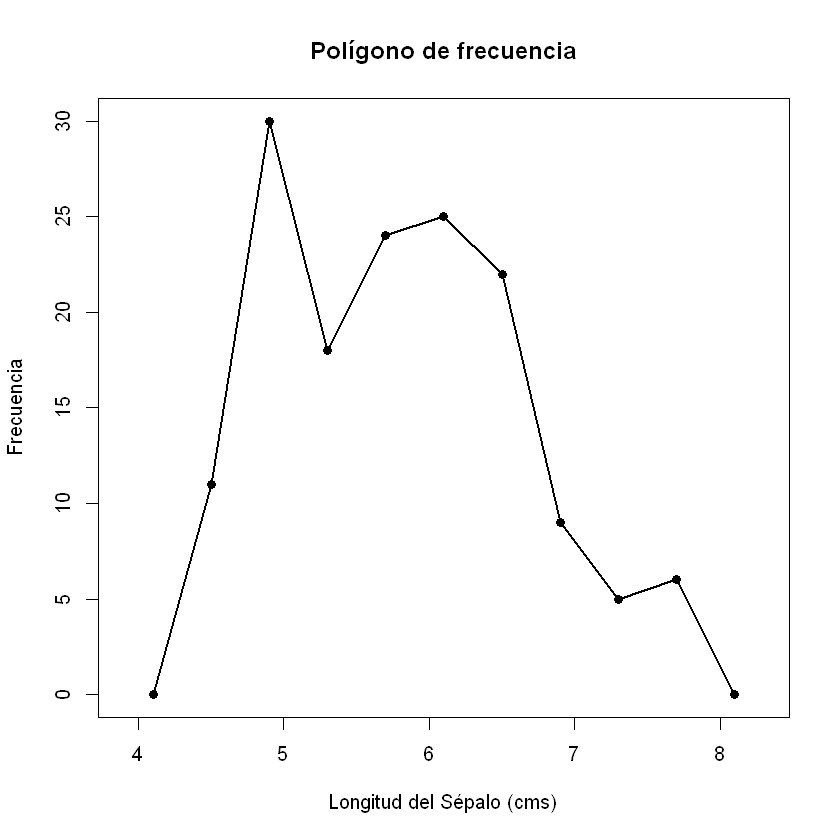

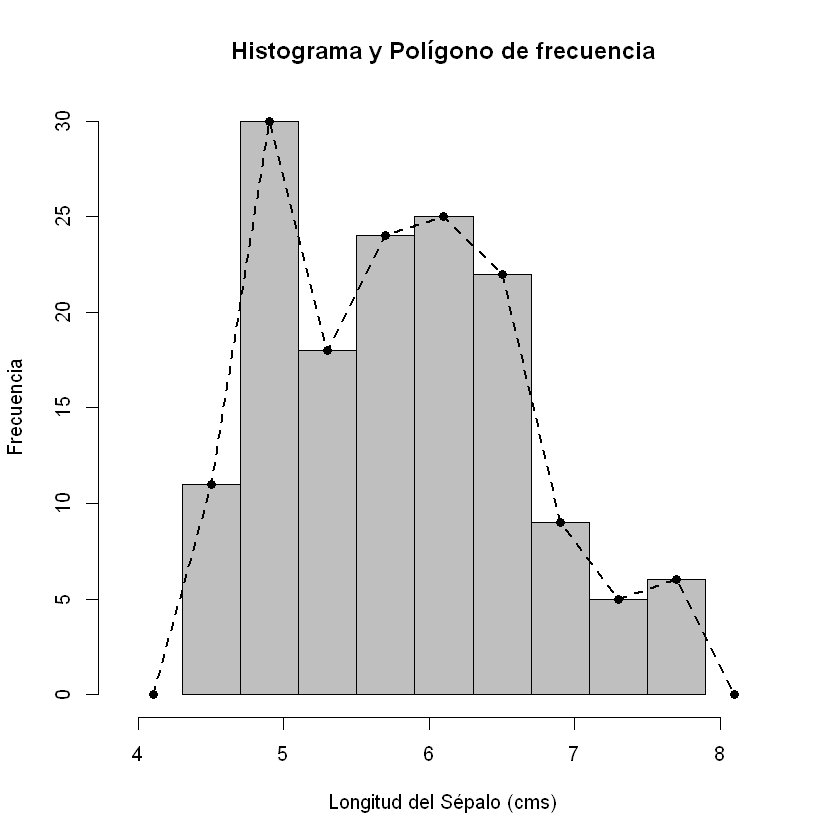

In [12]:
### Poligono de frecuencia
plot(x=c(4.1,dat_agrup$mr_class,8.1),
  y=c(0,dat_agrup$fr_abs,0),
  xlim=c(3.9,8.3),
  main="Polígono de frecuencia",
  xlab="Longitud del Sépalo (cms)",
  ylab="Frecuencia",
  lwd=2, lty=1, type="o", pch=16)


plot(hist_db, col="gray75",
xlim=c(3.9,8.3),
 main="Histograma y Polígono de frecuencia",
 xlab="Longitud del Sépalo (cms)",
 ylab="Frecuencia")

lines(c(4.1,dat_agrup$mr_class,8.1),c(0,dat_agrup$fr_abs,0), lwd=2, lty=2, type="o", pch=16)



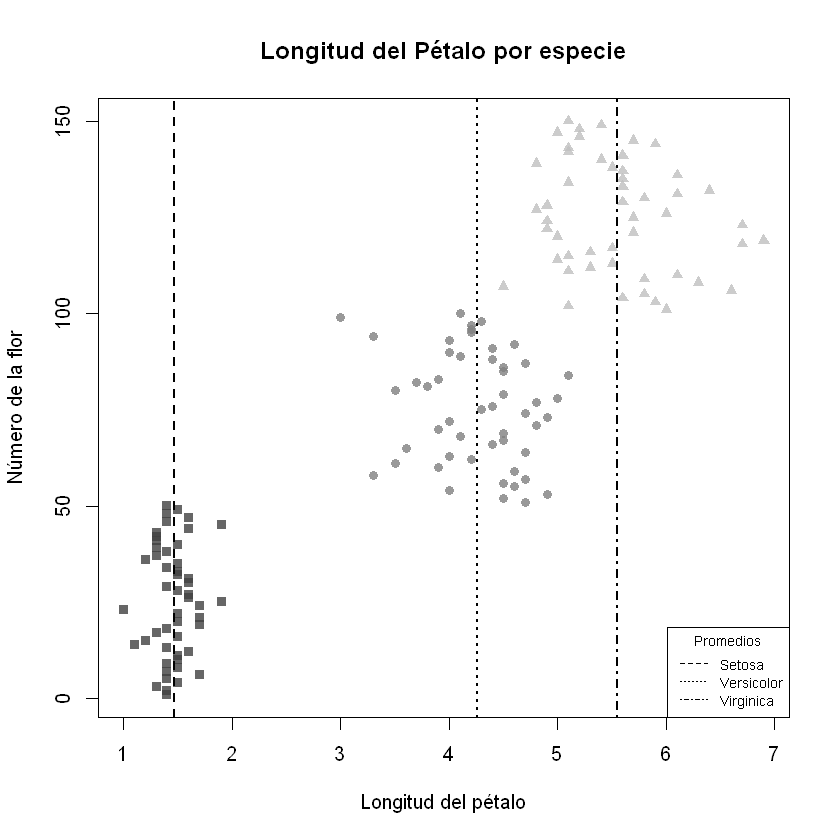

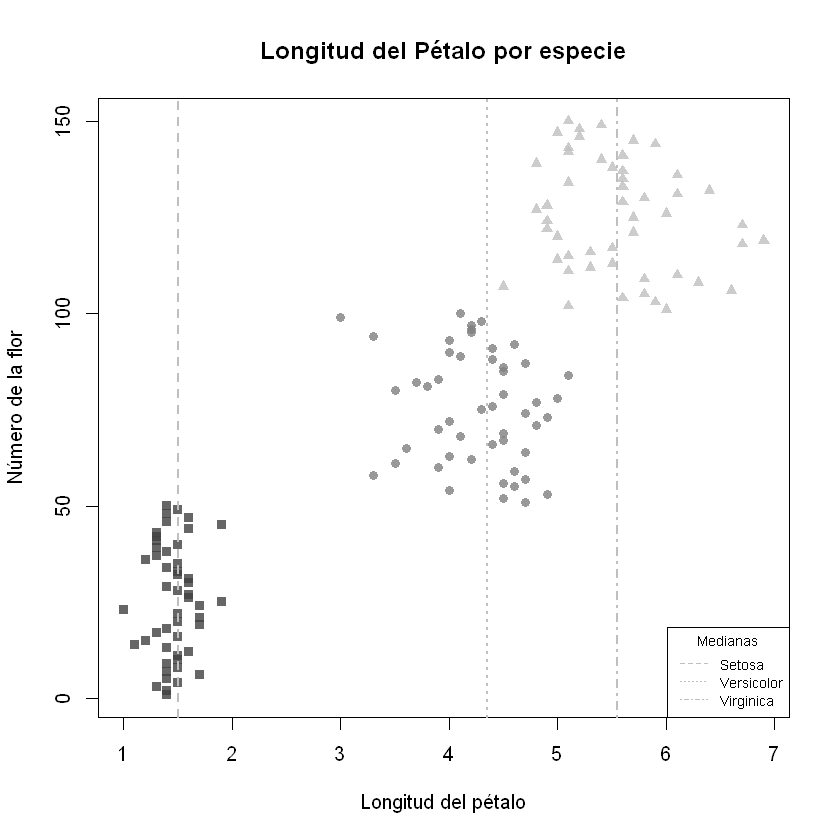

In [13]:

######################################
#### MEDIDAS DE TENDENCIA CENTRAL ####
######################################

### Medida de las tres especies
sp_means=by(iris$Petal.Length,iris$Species, mean)
sp_medians=by(iris$Petal.Length,iris$Species, median)


plot(x=iris$Petal.Length, 
     y=1:150, 
     col= sp_color,
     pch=sp_figure,
     main="Longitud del Pétalo por especie",
     xlab="Longitud del pétalo",
     ylab="Número de la flor")

## Linea de la media
abline(v=sp_means, lty=c(2,3,4), lwd=2)#["setosa"]
legend("bottomright",
	lty=c(2,3,4),
	title="Promedios", 
	legend=c("Setosa","Versicolor","Virginica"),
	cex=0.7)



plot(x=iris$Petal.Length, 
     y=1:150, 
     col= sp_color,
     pch=sp_figure,
     main="Longitud del Pétalo por especie",
     xlab="Longitud del pétalo",
     ylab="Número de la flor")

## Línea de la mediana
abline(v=sp_medians, lty=c(2,3,4), lwd=2, col="gray75")#["setosa"]
legend("bottomright",
	lty=c(2,3,4),
	title="Medianas", 
	legend=c("Setosa","Versicolor","Virginica"),
	col="gray75",
	cex=0.7)


  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width   
 Min.   :4.900   Min.   :2.000   Min.   :3.00   Min.   :1.000  
 1st Qu.:5.600   1st Qu.:2.525   1st Qu.:4.00   1st Qu.:1.200  
 Median :5.900   Median :2.800   Median :4.35   Median :1.300  
 Mean   :5.936   Mean   :2.770   Mean   :4.26   Mean   :1.326  
 3rd Qu.:6.300   3rd Qu.:3.000   3rd Qu.:4.60   3rd Qu.:1.500  
 Max.   :7.000   Max.   :3.400   Max.   :5.10   Max.   :1.800  

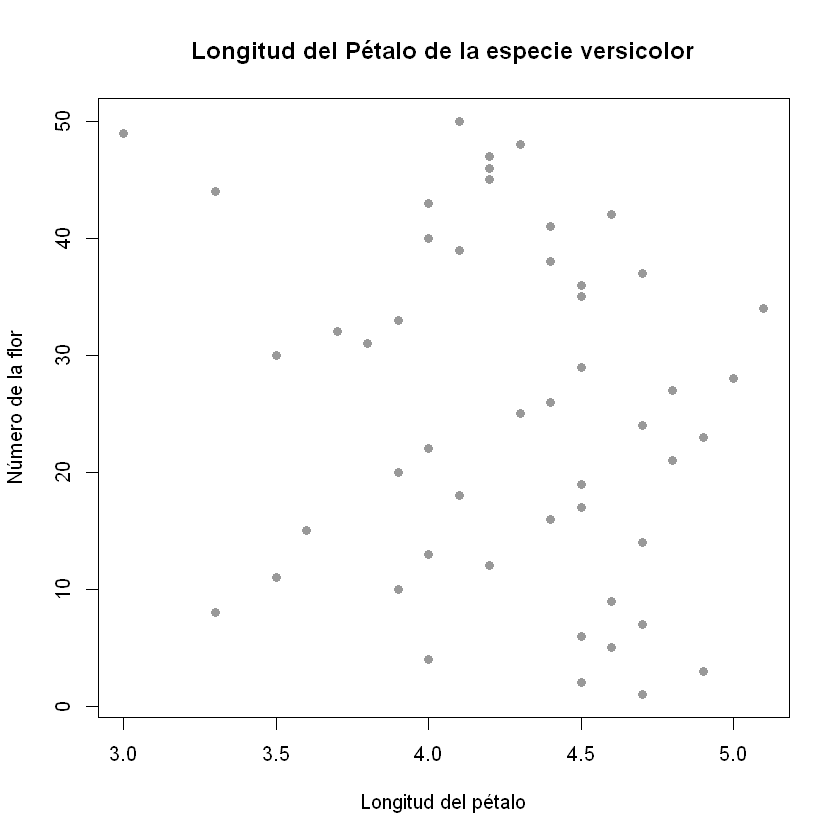

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       296.8        138.5        213.0         66.3

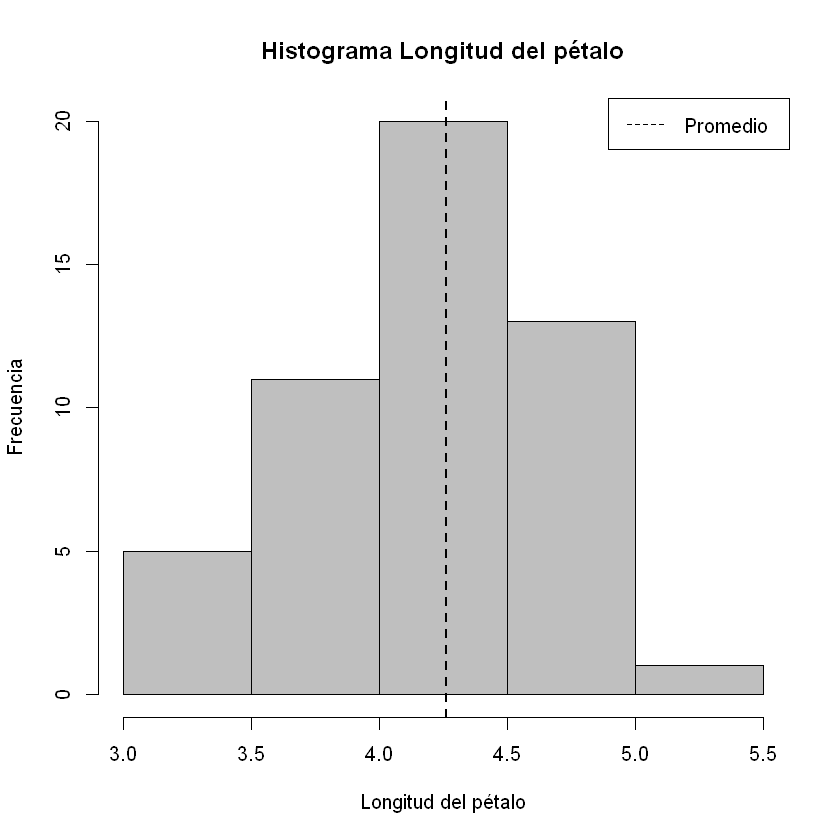

Sepal.Length  Sepal.Width Petal.Length  Petal.Width 
       296.8        138.5        213.0         66.3

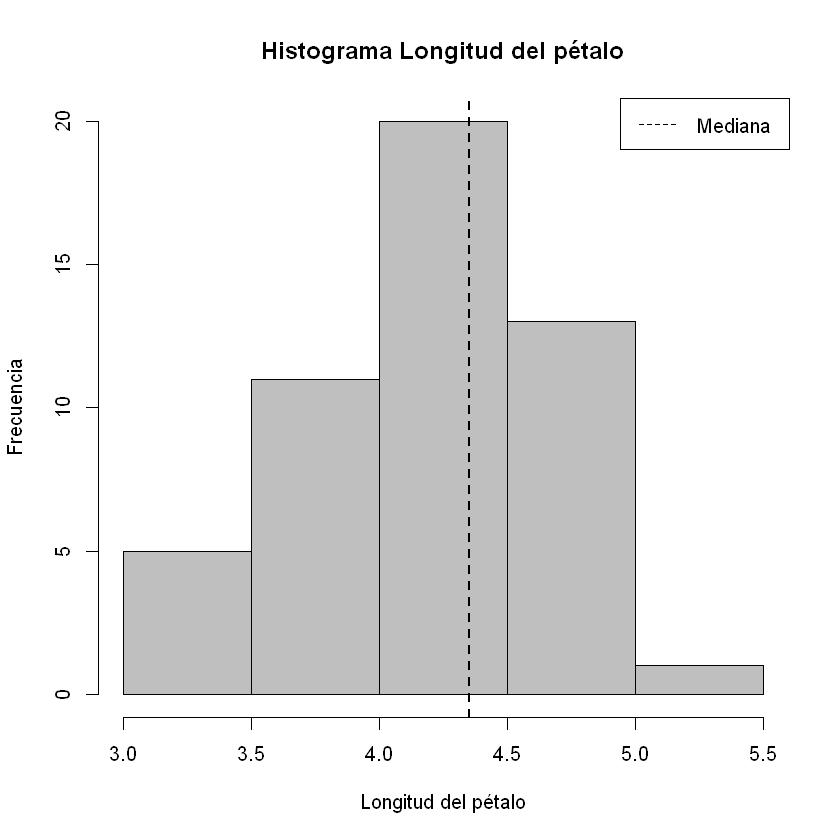

pet_long_versic,Freq
3,1
3.3,2
3.5,2
3.6,1
3.7,1
3.8,1
3.9,3
4,5
4.1,3
4.2,4


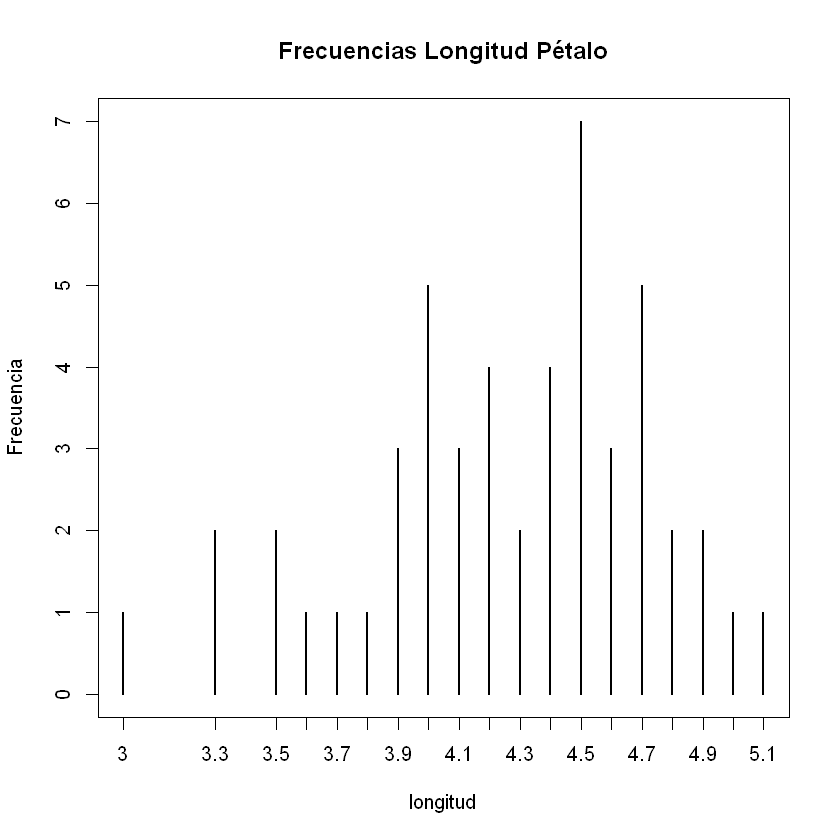

In [14]:
##### Promedio Versicolor #####

versicolor=iris[iris$Species=="versicolor",1:4]
#pairs(versicolor)
plot(x=versicolor$Petal.Length, 
	y=1:50, 
	pch=sp_figure[iris$Species=="versicolor"],
	col=sp_color[iris$Species=="versicolor"],
     main="Longitud del Pétalo de la especie versicolor",
     xlab="Longitud del pétalo",
     ylab="Número de la flor")

summary(versicolor)

hist(versicolor$Petal.Length, 
	col="gray75", 
	main="Histograma Longitud del pétalo",
	xlab="Longitud del pétalo",
	ylab="Frecuencia")
colSums(versicolor)

#Línea media
abline(v=mean(versicolor$Petal.Length), lty=2, lwd=2)
legend("topright",lty=2, legend="Promedio")



hist(versicolor$Petal.Length, 
	col="gray75", 
	main="Histograma Longitud del pétalo",
	xlab="Longitud del pétalo",
	ylab="Frecuencia")
colSums(versicolor)
#Línea mediana
abline(v=median(versicolor$Petal.Length), lty=2, lwd=2)
legend("topright",lty=2, legend="Mediana")

pet_long_versic=data.frame(sort(versicolor$Petal.Length))
colnames(pet_long_versic)="Longitud"
plot(table(pet_long_versic), main="Frecuencias Longitud Pétalo",
	xlab="longitud",
	ylab="Frecuencia")

data.frame(table(pet_long_versic))



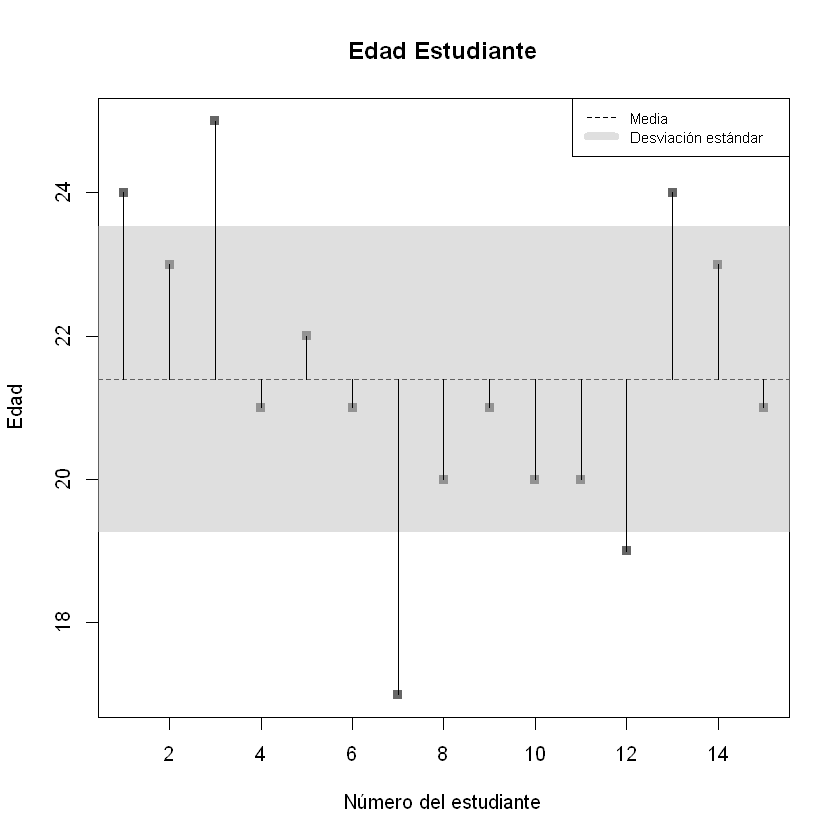

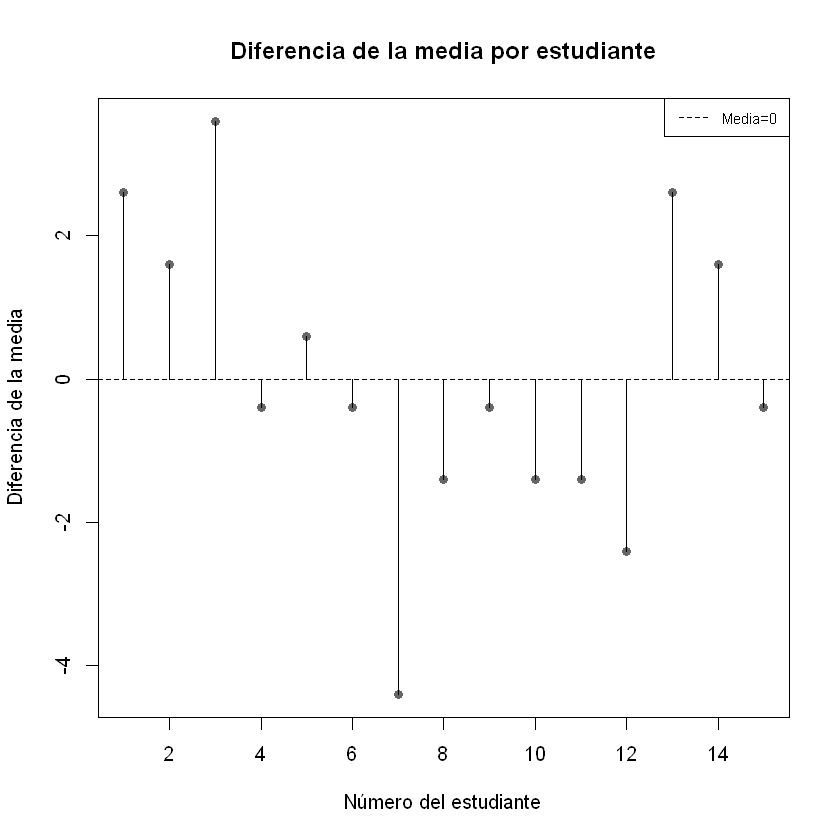

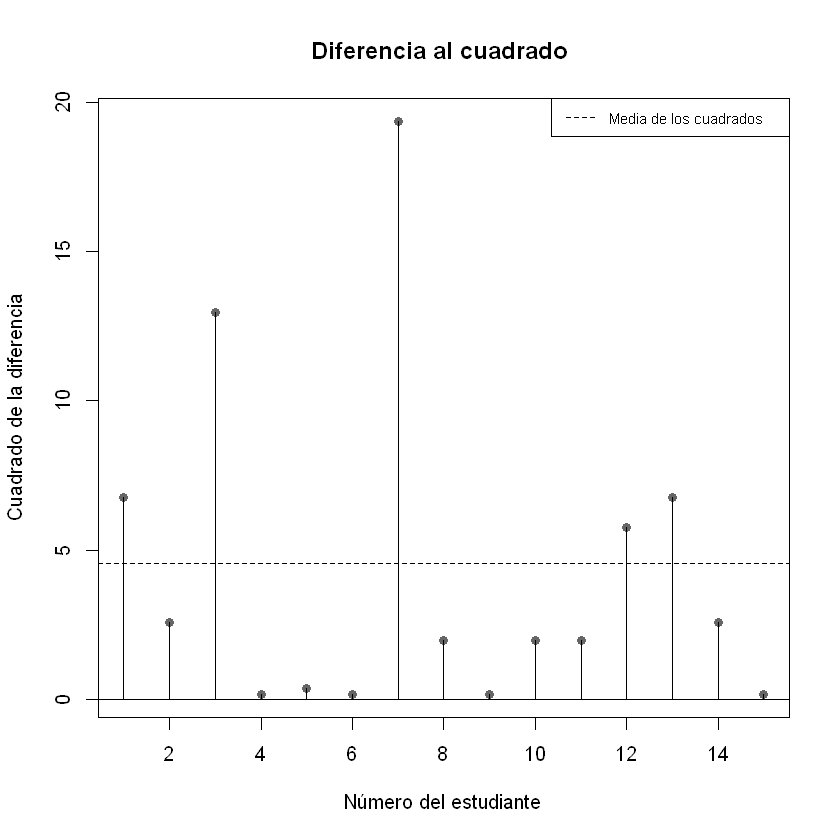

In [15]:
#######################################
####    DESVIACION ESTANDAR    ########
#######################################

# setosa sepal width #### Los errores son inferiores a cero y los cuadrados son muy pequeños
######var_data=sample(iris$Sepal.Length[iris$Species=="virginica"], 15);hist(var_data)
var_data=c(24, 23, 25, 21, 22, 21, 17, 20, 21, 20, 20, 19, 24, 23, 21)
#hist(var_data)

##Data frame cuadrados diferencia
desv_df=data.frame(x=var_data,
	x_x_bar=var_data-mean(var_data),
	err_sq=(var_data-mean(var_data))**2
)

sd_var=sqrt(sum(desv_df$err_sq)/14)### Desviación estándar

#### Graficar puntos y distancia del promedio
plot(y=var_data, 
	x=1:15, 
	pch=15,
	col=rgb(.25,.25,.25,.8),
     main="Edad Estudiante",
     ylab="Edad",
     xlab="Número del estudiante")
abline(h=mean(var_data), lty=2)# línea del promedio

legend("topright",lty=2, legend="Media", cex=.75) # Legenda solo línea media 


##Franja de la desviación estándar
polygon (x=c(0,0,16,16), 
	y=c(mean(var_data)-sd_var,mean(var_data)+sd_var,mean(var_data)+sd_var,mean(var_data)-sd_var), 
	border=NA,
	col=rgb(.75,.75,.75,.5))

# Legenda línea media con desviación estándar
legend("topright",
	lty=c(2,1), 
	lwd=c(1,7),
	col=c(1,rgb(.75,.75,.75,.5)),
	legend=c("Media","Desviación estándar"), 
	cex=.75) 



##Lineas de distancia por punto
for (i in 1:15){
	lines(y=c(mean(var_data),var_data[i]),
		x=c(i,i))} 

####### Gaficar las diferencias respecto a la media
plot(y=desv_df$x_x_bar, 
	x=1:15, 
	pch=16,
	col=rgb(.25,.25,.25,.8),
     main="Diferencia de la media por estudiante",
     ylab="Diferencia de la media",
     xlab="Número del estudiante")

abline(h=0, lty=2)# línea del promedio
legend("topright",lty=2, legend="Media=0", cex=.75) 

for (i in 1:15){
	lines(y=c(0,desv_df$x_x_bar[i]),
		x=c(i,i))} #Linea de distancia por punto

####### Graficar las diferencias respecto a la media al cuadrado
plot(y=desv_df$err_sq, 
	x=1:15, 
	pch=16,
	col=rgb(.25,.25,.25,.8),
     main="Diferencia al cuadrado ",
     ylab="Cuadrado de la diferencia",
     xlab="Número del estudiante")

abline(h=0, lty=1)# línea de referencia
abline(h=sum(desv_df$err_sq)/14, lty=2)# línea del promedio
legend("topright",lty=2, legend="Media de los cuadrados", cex=.75) 

for (i in 1:15){
	lines(y=c(0,desv_df$err_sq[i]),
		x=c(i,i))} #Linea de distancia por punto


limits,mr_class,fr_abs,fr_rel,fr_abs_acum,fr_rel_acum,z_mr_class
16 - 17,16.5,2,0.008,2,0.008,-2.96
17 - 18,17.5,4,0.016,6,0.024,-2.45
18 - 19,18.5,13,0.052,19,0.076,-1.94
19 - 20,19.5,25,0.100,44,0.176,-1.42
20 - 21,20.5,42,0.168,86,0.344,-0.91
21 - 22,21.5,49,0.196,135,0.540,-0.40
22 - 23,22.5,50,0.200,185,0.740,0.12
23 - 24,23.5,34,0.136,219,0.876,0.63
24 - 25,24.5,20,0.080,239,0.956,1.14
25 - 26,25.5,8,0.032,247,0.988,1.66


Edades,Z_val
23,0.3735935
21,-0.6527624
20,-1.1659403
22,-0.1395844
28,2.9394833
23,0.3735935
23,0.3735935
23,0.3735935
21,-0.6527624
22,-0.1395844


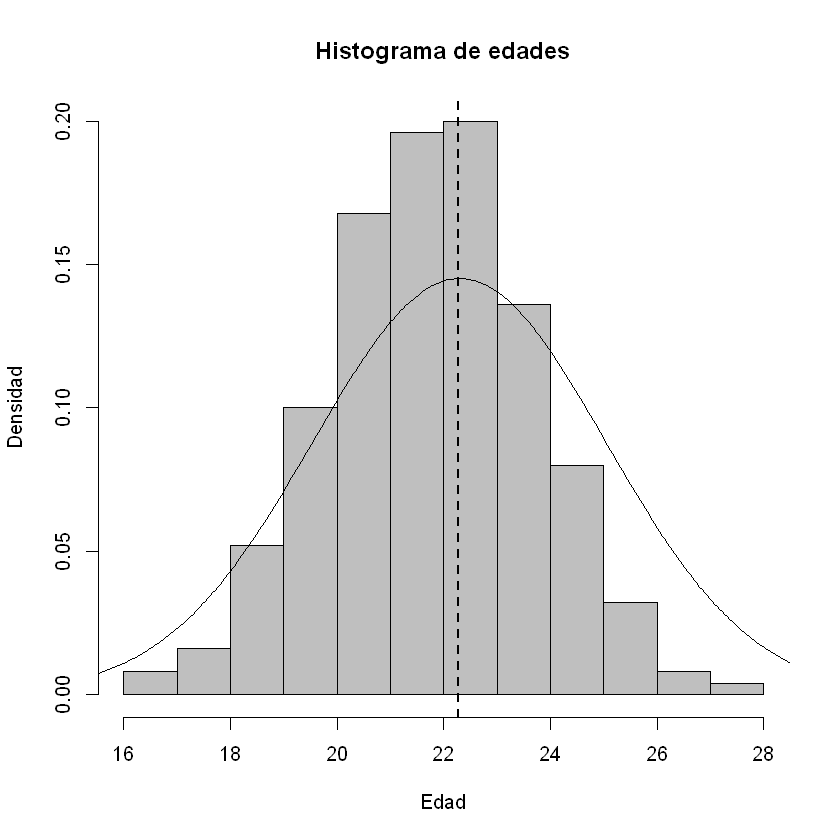

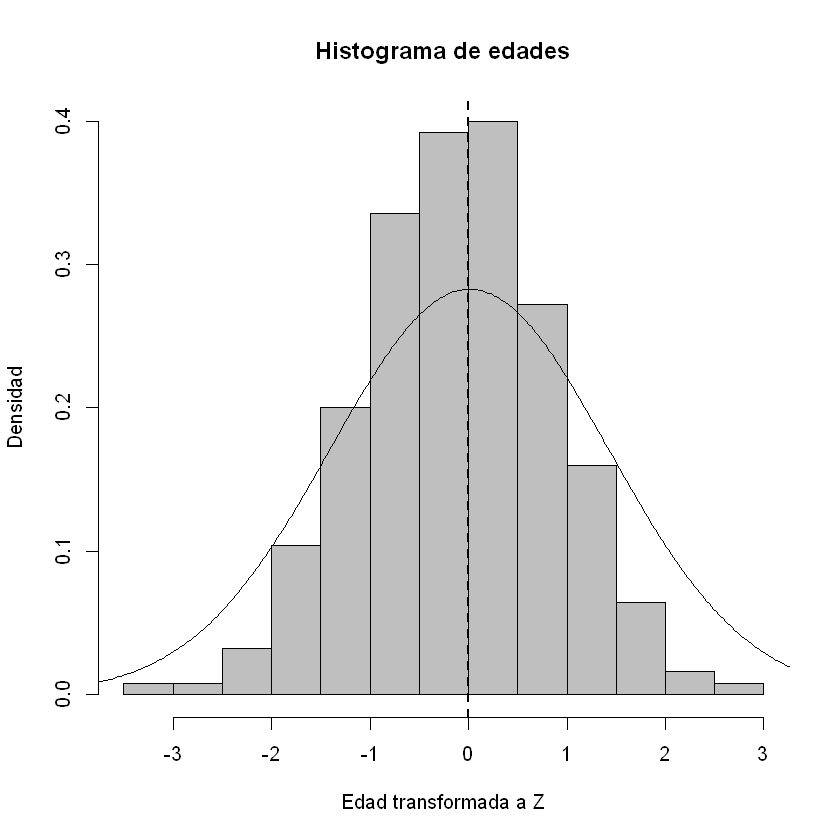

In [27]:
#### Curva Normal
#ed_200=round(rnorm(250,22,2),0)
ed_250=c(23, 21, 20, 22, 28, 23, 23, 23, 21, 22, 20, 23, 
         22, 19, 23, 20, 19, 20, 19, 26, 22, 23, 24, 21, 
         22, 22, 23, 21, 24, 19, 23, 24, 22, 23, 21, 23, 
         23, 24, 22, 24, 22, 21, 23, 26, 22, 23, 23, 20, 
         22, 20, 23, 23, 22, 23, 23, 26, 22, 24, 25, 23, 
         22, 19, 22, 24, 24, 22, 21, 21, 22, 21, 22, 24, 
         21, 20, 22, 22, 25, 23, 23, 20, 21, 21, 21, 23, 
         22, 20, 23, 18, 18, 22, 22, 23, 23, 26, 22, 23, 
         19, 22, 24, 23, 21, 24, 27, 21, 24, 21, 23, 25, 
         25, 22, 24, 21, 22, 23, 20, 20, 19, 25, 24, 21, 
         25, 23, 21, 21, 21, 23, 21, 22, 22, 22, 22, 22, 
         24, 21, 20, 24, 18, 22, 23, 25, 20, 20, 21, 25, 
         27, 25, 23, 21, 20, 24, 17, 21, 20, 22, 23, 22, 
         19, 23, 21, 25, 23, 23, 21, 20, 24, 21, 25, 24, 
         24, 23, 21, 21, 23, 22, 23, 25, 23, 21, 25, 22, 
         20, 20, 26, 21, 23, 19, 21, 23, 22, 24, 24, 22, 
         24, 25, 23, 20, 25, 25, 20, 22, 19, 24, 26, 21, 
         24, 24, 25, 20, 22, 19, 23, 21, 24, 22, 23, 24, 
         26, 23, 21, 25, 24, 24, 16, 24, 22, 18, 22, 21, 
         22, 20, 24, 22, 23, 21, 24, 26, 25, 22, 21, 25, 
         19, 24, 20, 19, 21, 21, 23, 22, 20, 22 )

hist_ed=hist(ed_250, main="Histograma de edades", xlab="Edad", ylab="Densidad", col="gray75", freq=F)
lines(density(ed_250, bw=sd(ed_250)), lwd=1.5)
abline(v=mean(ed_250), lty=2, lwd=2)

z_ed_250=(ed_250-mean(ed_250))/sd(ed_250)

dat_agrup_250=data.frame(
	limits=paste(hist_ed$breaks[1:12], hist_ed$breaks[2:13], sep=" - "),
	mr_class=hist_ed$mids,
	fr_abs=hist_ed$counts,
	fr_rel=round(hist_ed$counts/250,3),
	fr_abs_acum=cumsum(hist_ed$counts),
	fr_rel_acum=round(cumsum(hist_ed$counts/250),3),
	z_mr_class=round((hist_ed$mids-mean(ed_250))/sd(ed_250),2)
);dat_agrup_250
#write.csv2(dat_agrup_250, file="dats_edad.csv")
z_eds_df=data.frame(
	Edades=ed_250,
	Z_val=z_ed_250
);z_eds_df
#write.csv2(z_eds_df, file="Z_edades.csv")


hist(z_ed_250, main="Histograma de edades", xlab="Edad transformada a Z", ylab="Densidad", col="gray75", freq=F)
lines(density(z_ed_250, bw=sd(z_ed_250)), lwd=1.5)
abline(v=mean(z_ed_250), lty=2, lwd=2)


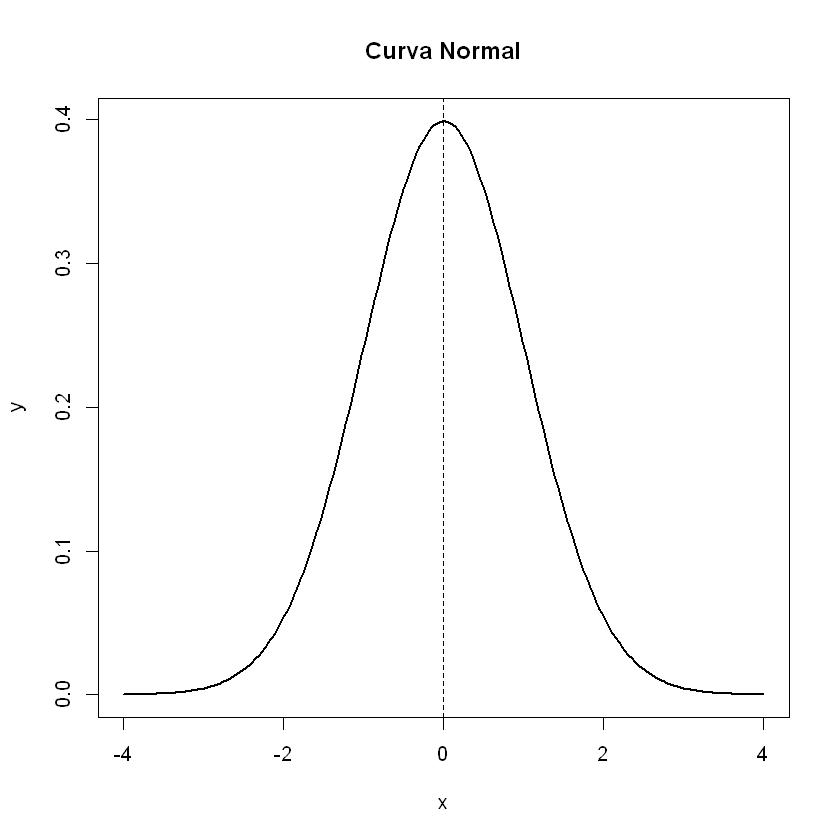

In [3]:
x=seq(-4,4,length=200)
y=1/sqrt(2*pi)*exp(-x^2/2)
plot(x,y,type="l",lwd=2, main="Curva Normal")
abline(v=0, lty=2)

[1] 0.9945264

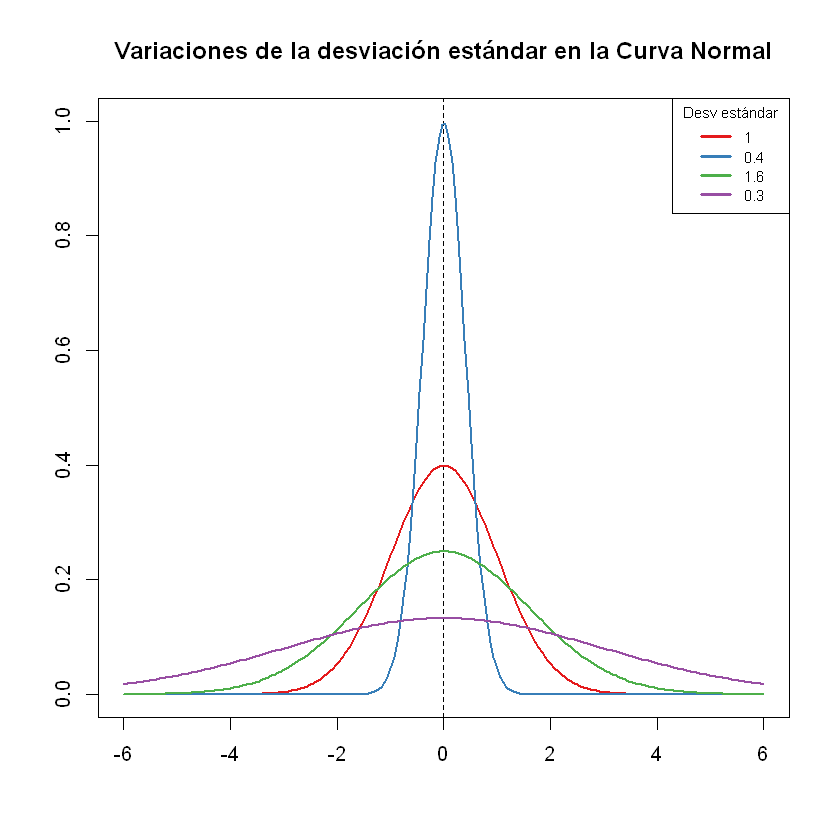

In [26]:
x_seq=seq(-6,6,length=200)
sigma=1 ##DesvEst
mu=0 ##Mean
dens_funct_norm=function(x, mu, sigma){
    return=(1/(sigma*sqrt(2*pi)))*exp((-(x-mu)^2)/(2*sigma^2))
}
y_1=dens_funct_norm(x_seq, 0, 1)
y_2=dens_funct_norm(x_seq, 0, 0.4)
y_3=dens_funct_norm(x_seq, 0, 1.6)
y_4=dens_funct_norm(x_seq, 0, 3)

lin_clrs=c('#e41a1c','#377eb8','#4daf4a','#984ea3')
y_s=data.frame(y_1,y_2,y_3,y_4)
max(y_s)
plot(0,0,xlim=c(-6,6), 
     ylim=c(0,001), 
     col="white", 
     main="Variaciones de la desviación estándar en la Curva Normal", 
     xlab="", ylab="")
abline(v=0, lty=2)
for(i in 1:ncol(y_s)){
    lines(x_seq,y_s[,i],lwd=2, col=lin_clrs[i])
}
legend("topright", legend=c(1,0.4,1.6,0.3),lty=1,lwd=2.5, col=lin_clrs,cex=.75,title="Desv estándar") 


#type="l",lwd=2, main="Curva Normal")


In [24]:
(y_s)

y_1,y_2,y_3,y_4
6.075883e-09,1.382677e-49,0.0002203723,0.01799699
8.708662e-09,1.311773e-48,0.0002536461,0.01873144
1.243696e-08,1.216541e-47,0.0002915294,0.01948799
1.769693e-08,1.102870e-46,0.0003345952,0.02026691
2.509010e-08,9.773543e-46,0.0003834778,0.02106844
3.544276e-08,8.466611e-45,0.0004388780,0.02189283
4.988542e-08,7.169636e-44,0.0005015688,0.02274028
6.995848e-08,5.934916e-43,0.0005724010,0.02361100
9.775252e-08,4.802439e-42,0.0006523089,0.02450516
1.360932e-07,3.798736e-41,0.0007423170,0.02542290


http://www.statisticshowto.com/probability-and-statistics/normal-distributions/
https://www.mathsisfun.com/data/standard-normal-distribution.html
https://www.itl.nist.gov/div898/handbook/eda/section3/eda3661.htm
https://statistics.laerd.com/statistical-guides/normal-distribution-calculations.php


https://www.statmethods.net/advgraphs/probability.html
http://msenux2.redwoods.edu/MathDept/R/StandardNormal.php
https://gist.github.com/jrnold/6799152
http://msenux2.redwoods.edu/MathDept/R/normal.php



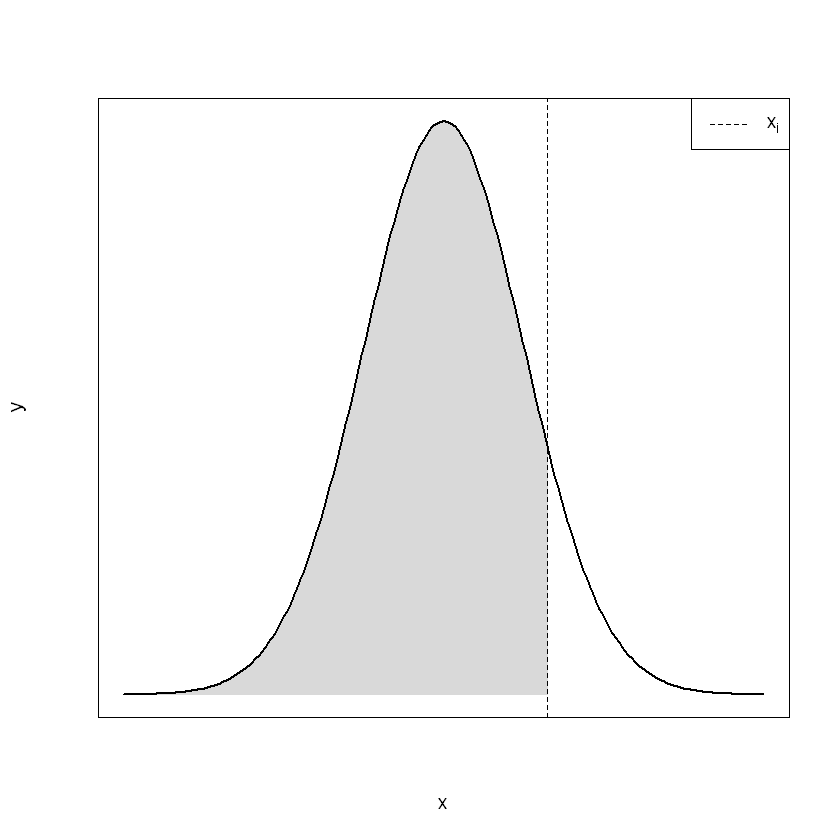

In [19]:
x=seq(-4,4,length=200)
y=dnorm(x)
hist()
plot(x,y,type="l", xaxt='n', yaxt='n')

xlim=1.3
clr="gray85"
x_1=seq(-4,xlim,length=200)
y_1=dnorm(x_1)
polygon(c(-4,x_1,xlim),c(0,y_1,0),col=clr,border=clr)
lines(x,y,type="l", lwd=2)
abline(v=xlim, lty=2)
legend("topright", legend=expression("x"["i"]), lty=2)

In [22]:
z_func=function(x,mu,sigma){
    ((x-mu)/sigma)
}

In [25]:
mean(ed_250)
sd(ed_250)
z_func(20,mean(ed_250), sd(ed_250))
z_func(20,22.3,1.95)


[1] 22.272

[1] 1.948642

[1] -1.16594

[1] -1.179487

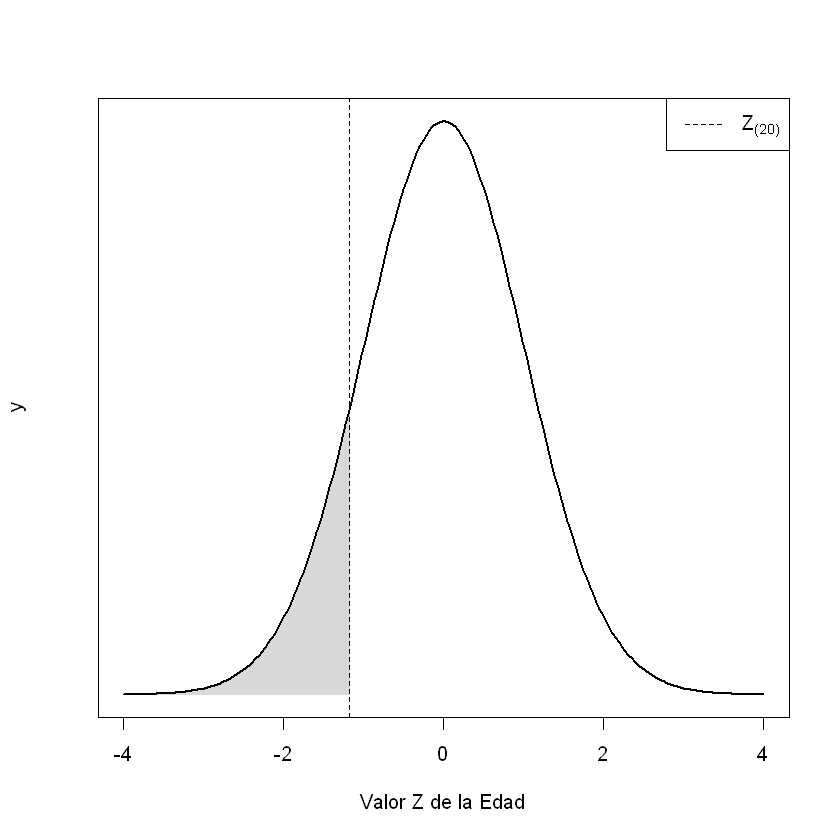

In [32]:
x=seq(-4,4,length=200)
y=dnorm(x)
plot(x,y,type="l", yaxt='n', xlab="Valor Z de la Edad")#xaxt='n'

xlim=z_func(20,22.3,1.95)
clr="gray85"
x_1=seq(-4,xlim,length=200)
y_1=dnorm(x_1)
polygon(c(-4,x_1,xlim),c(0,y_1,0),col=clr,border=clr)
lines(x,y,type="l", lwd=2)
abline(v=xlim, lty=2)
legend("topright", legend=expression("Z"["(20)"]), lty=2)

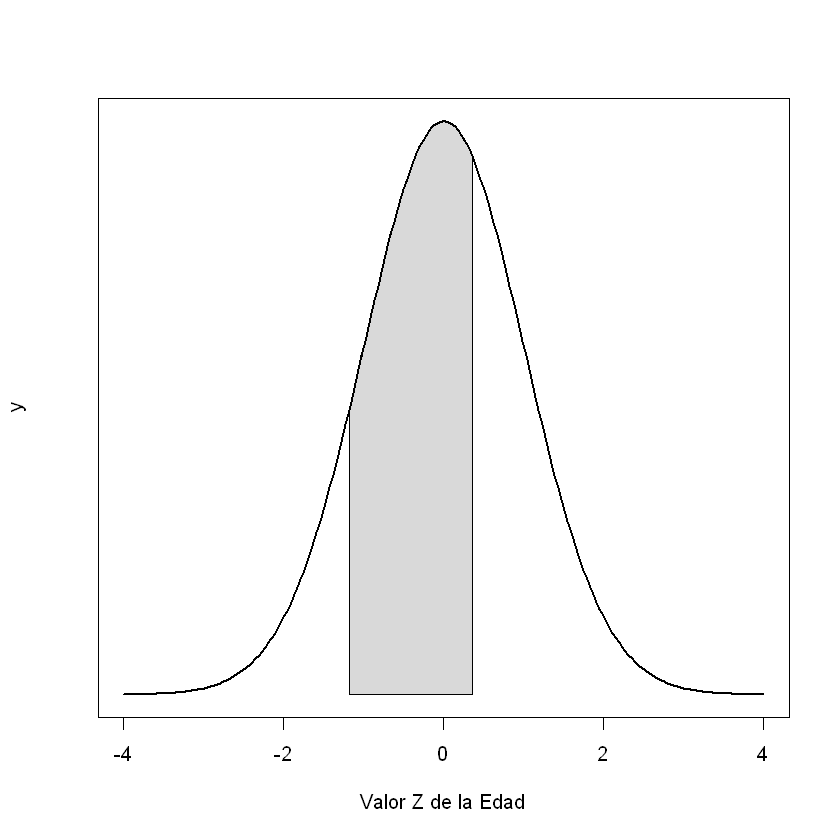

In [38]:
x=seq(-4,4,length=200)
y=dnorm(x)
plot(x,y,type="l", yaxt='n', xlab="Valor Z de la Edad")#xaxt='n'

xlim_sup=z_func(23,22.3,1.95)
xlim_inf=z_func(20,22.3,1.95)
clr="gray85"
x_1=seq(xlim_inf,xlim_sup,length=200)
y_1=dnorm(x_1)
polygon(c(xlim_inf,x_1,xlim_sup),c(0,y_1,0),col=clr)
lines(x,y,type="l", lwd=2)
#abline(v=xlim, lty=2)
#legend("topright", legend=expression("Z"["(20)"]), lty=2)

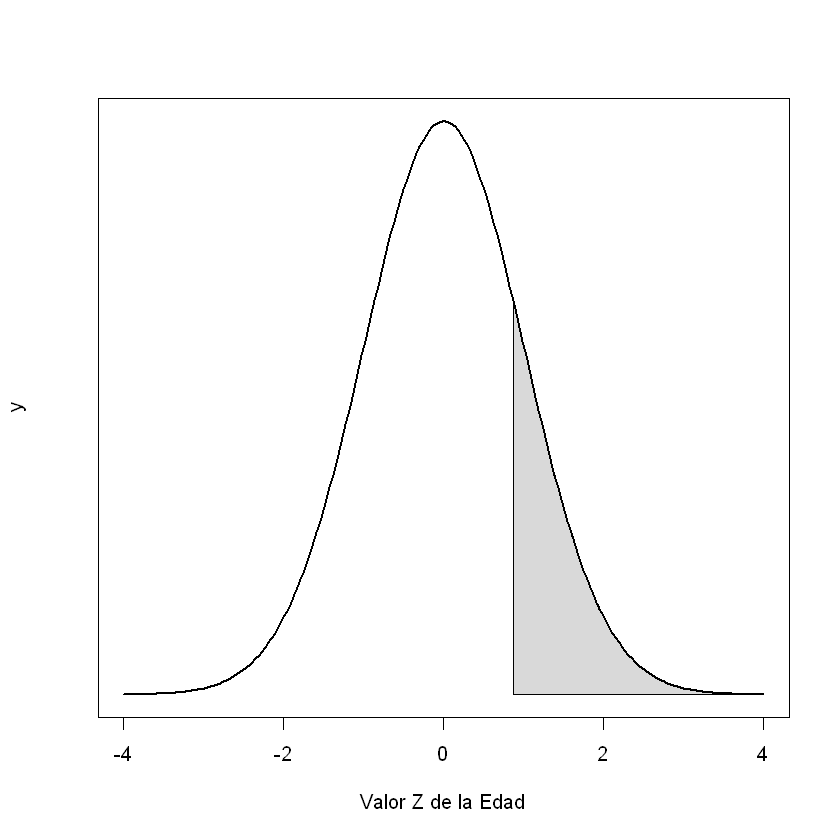

In [40]:
x=seq(-4,4,length=200)
y=dnorm(x)
plot(x,y,type="l", yaxt='n', xlab="Valor Z de la Edad")#xaxt='n'

xlim_inf=z_func(24,22.3,1.95)
clr="gray85"
x_1=seq(xlim_inf,4,length=200)
y_1=dnorm(x_1)
polygon(c(xlim_inf,x_1,4),c(0,y_1,0),col=clr)
lines(x,y,type="l", lwd=2)
#abline(v=xlim, lty=2)
#legend("topright", legend=expression("Z"["(20)"]), lty=2)